## Week 4-1: Classification

#### Last time
* Lasso - LAR & Coordinate descent
* Variants of the lasso method

#### Today
* Classification
    - Logistic regression
    - LDA and QDA

#### Reference
- James Sharpnack's lecture notes
- Ch 4 of ESL

## Introduction to classification

We have seen how you can evaluate a supervised learner with a loss function.  Classification is the learning task where one tried to predict a binary response variable, this can be thought of as the answer to a yes/no question, as in "Will this stock value go up today?".  

This is in contrast to regression which predicts a continuous response variable, answering a question such as "What will be the increase in stock value today?".  

Classification has some interesting lessons for other machine learning tasks, and we will try to introduce many of the main concepts in classification.

Recall that the _supervised learning_ setting has that the data consists of response variables, $y_i$ and predictor variables $x_i$ for $i=1,\ldots,n$.  We will focus on binary classification which we will encode as the binary variable: $y_i \in \{0,1\}$.  We will see that two hueristics can help us understand the basics of evaluating classifiers.

### Logistic regression

The logistic regression is a supervised learning algorithm that is widely used for classification. 
The outcome of the logistic regression is discrete and restricted to a limited number of values.

Consider the logistic regression model with a binary outcome (say, 0 and 1), the model has the form 
$$
\log \frac{P(C = 1 | X = x)}{P(C = 0 | X = x)} = \beta'x,
$$
where $\beta = (\beta_0, \beta_1)$, $\beta_0 \in \mathbb{R}$ and $\beta_1 \in \mathbb{R}^p$, and $x = [1, \tilde x] \in \mathbb{R}^{p+1}$.
The ratio is known as the _odds-ratio_. 

By calculation, one can show that 
$$
P(C = 1 | X = x) = \frac{e^{\beta'x}}{1 + e^{\beta'x}}
$$

We denote the probability $P(C = 1 | X = x) = p(x; \beta)$, where $\beta = (\beta_0, \beta_1)$; similarly, $P(C = 0|X=x) = 1 - p_0(x; \beta)$;



The log-likelihood function can be written as 
\begin{align*}
\ell(\beta) & = \sum_{i = 1}^n \{y_i \log p(x_i;\beta) + (1-y_i) \log (1-p(x_i; \beta))\}\\
            & = \sum_{i = 1}^n \{y_i \beta' x_i - \log (1+e^{\beta'x_i})\}
\end{align*}

Then by taking derivatives to zero, we have
$$
\frac{d \ell(\beta)}{d \beta} = \sum_{i=1}^n x_i (y_i - p(x_i; \beta)) = 0,
$$
which are $p+1$ equations that are nonlinear in $\beta$. How to solve $\beta$? (Newton's algorithm)


Iterating $j = 1, \dots, K$, 
$$
\beta_j = \beta_{j-1} + s\Big(-\frac{d^2 \ell(\beta)}{d\beta d\beta'}\Big)^{-1} \frac{d\ell(\beta)}{d\beta}.
$$


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotnine as p9
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.simplefilter("ignore")

np.random.seed(2022041801)

In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 6,6

#### Logistic regression in action

In [3]:
def lm_sim(N = 100):
    """simulate a binary response and two predictors"""
    X1 = (np.random.randn(N*2)).reshape((N,2)) + np.array([2,3])
    X0 = (np.random.randn(N*2)).reshape((N,2)) + np.array([.5,1.5])
    y = - np.ones(N*2)
    y[:N]=1
    X = np.vstack((X1,X0))
    return X, y, X0, X1

In [4]:
X_sim,y_sim,X0,X1 = lm_sim()

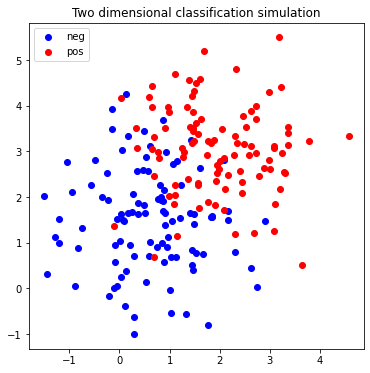

In [5]:
plt.scatter(X0[:,0],X0[:,1],c='b',label='neg')
plt.scatter(X1[:,0],X1[:,1],c='r',label='pos')
plt.title("Two dimensional classification simulation")
_ = plt.legend(loc=2)

The red dots correspond to ``Y = +1`` and blue is ``Y = -1``.  We can see that a classifier that classifies as +1 when the point is in the upper right of the coordinate system should do pretty well.  We could propose several $\beta$ vectors to form linear classifiers and observe their training errors, finally selecting the one that minimized the training error.    We have seen that a linear classifier has a separator hyperplane (a line in 2 dimensions).  To find out what the prediction the classifier makes for a point one just needs to look at which side of the hyperplane it falls on.  Consider a few such lines.

In [6]:
from sklearn import linear_model

lr_sim = linear_model.LogisticRegression()
lr_sim.fit(X_sim,y_sim)

beta1 = lr_sim.coef_[0,0]
beta2 = lr_sim.coef_[0,1]
beta0 = lr_sim.intercept_

mults=0.8
T = np.linspace(-1,4,100)
x2hat = -(beta0 + beta1*T) / beta2
line1 = -(beta0 + np.random.randn(1)*2 + 
          (beta1 + np.random.randn(1)*mults) *T) / (beta2 + np.random.randn(1)*mults)
line2 = -(beta0 + np.random.randn(1)*2 + 
          (beta1 + np.random.randn(1)*mults) *T) / (beta2 + np.random.randn(1)*mults)
line3 = -(beta0 + np.random.randn(1)*2 + 
          (beta1 + np.random.randn(1)*mults) *T) / (beta2 + np.random.randn(1)*mults)

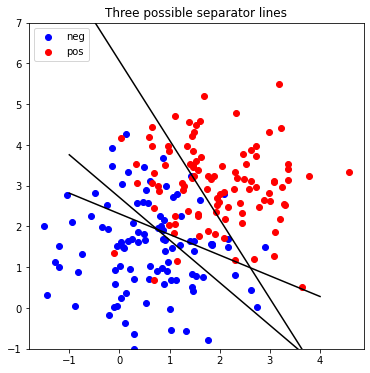

In [7]:
plt.scatter(X0[:,0],X0[:,1],c='b',label='neg')
plt.scatter(X1[:,0],X1[:,1],c='r',label='pos')
plt.plot(T,line3,c='k')
plt.plot(T,line1,c='k')
plt.plot(T,line2,c='k')
plt.ylim([-1,7])
plt.title("Three possible separator lines")
_ = plt.legend(loc=2)

One of these will probably do a better job at separating the training data than the others, but if we wanted to do this over all possible $\beta \in \mathbb R^{p+1}$ then we need to solve the program (0-1 min) above.

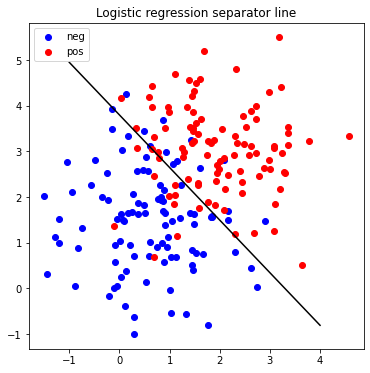

In [8]:
plt.scatter(X0[:,0],X0[:,1],c='b',label='neg')
plt.scatter(X1[:,0],X1[:,1],c='r',label='pos')
plt.plot(T,x2hat,c='k')
plt.title("Logistic regression separator line")
_ = plt.legend(loc=2)

The points above this line are predicted as a +1, and so we can also isolate those points that we classified incorrectly.  The 0-1 loss counts each of these points as a loss of 1.

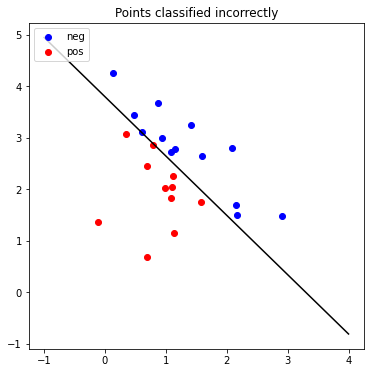

In [9]:
N = 100
y_hat = lr_sim.predict(X_sim)
plt.scatter(X0[y_hat[N:] == 1,0],X0[y_hat[N:] == 1,1],c='b',label='neg')
plt.scatter(X1[y_hat[:N] == -1,0],X1[y_hat[:N] == -1,1],c='r',label='pos')
plt.plot(T,x2hat,c='k')
plt.title("Points classified incorrectly")
_ = plt.legend(loc=2)

#### Linear discriminant analysis

Consider estimating $P(C=1|X)$ for binary clusters. Suppose $f_1(x)$ is the class-conditional density of $X$ in $C = 1$, let $\pi$ be the prior probability of this class, by applying Bayes rule, we have
$$
P(C = 1 | X = x) = \frac{f_1(x)\pi}{f_0(x) (1-\pi) + f_1(x) \pi},
$$
where $f_0(\cdot)$ the conditional density of $X$ in $C = 0$.

Assuming $f_k \sim N(\mu_k, \Sigma_k)$ and $\Sigma_k = \Sigma$ for $k = 0,1$, then the log-ratio between the two classes are 
\begin{align}
\log \frac{P(C = 1|X)}{P(C=0|X)}
& = \log \frac{f_1(x)}{f_0(x)} + \log \frac{\pi}{1-\pi}\\
& = \log  \frac{\pi}{1-\pi} - \frac{1}{2} (\mu_1 + \mu_0)'\Sigma^{-1} (\mu_1 + \mu_0) + x'\Sigma^{-1}(\mu_1 - \mu_0),
\end{align}
which is _linear in $x$_.


In practice, we do not know the parameters of the Gaussian distributions, we estimate them from the training data:
- $\hat \pi = n_1/n$, where $n_1$ is the number observation in Class $1$;
- $\hat \mu_k = \sum_{i \in N_k} x_i / n_k$, where $N_k$ is the set containing the observations in Class 1;
- $\hat \Sigma = \sum_{k=0}^1 \sum_{i \in N_k} (x_i - \hat \mu_k)(x_i - \hat \mu_k)'/(n - n_k)$

The LDA rule in favor of Class 1 if the log-ratio is larger than 1, i.e., 
$$
x'\Sigma^{-1}(\mu_1 - \mu_0) > \frac{1}{2} (\mu_1 + \mu_0)'\Sigma^{-1} (\mu_1 + \mu_0) - \log \frac{\pi}{1-\pi}.
$$

#### Quadratic Discriminant Analysis (QDA)

Similar to LDA, but allow $\Sigma_k$ to differ.
Then 
- $\hat \Sigma_k = \sum_{i \in N_k} (x_i - \hat \mu_k)(x_i - \hat \mu_k)'/(n - n_k)$

#### Regularized Discriminant Analysis 

Friedman (1989) proposed a compromise between LDA and QDA, which allows one to shrink the separate covariance of QDA toward a common covariance as in LDA
$$
\hat \Sigma_k(\alpha) = \alpha \hat\Sigma_k + (1-\alpha) \hat\Sigma
$$

In [10]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_hat_lda = lda.fit(X_sim, y_sim).predict(X_sim)

In [12]:
y_hat_lda - y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### LDA vs logistic regression?

Note that the log-odds of the LDA model is linear to $x$:

\begin{align}
\log \frac{P(C = 1|X)}{P(C=0|X)}
& = \log \frac{f_1(x)}{f_0(x)} + \log \frac{\pi}{1-\pi}\\
& = \log  \frac{\pi}{1-\pi} - \frac{1}{2} (\mu_1 + \mu_0)'\Sigma^{-1} (\mu_1 + \mu_0) + x'\Sigma^{-1}(\mu_1 - \mu_0)\\
& = \alpha_0 + \alpha_1'x
\end{align}

The log-odds of the logistic regression is 
$$\log \frac{P(C = 1 | X = x)}{P(C = 0 | X = x)} = \beta_0 + \beta_1'x$$

Indeed, the two models seem are the same! 

Note that the difference between the two models is the linear coefficients that are estimated. The logistic regression model is more general, as it makes less assumptions. Why?

Q: how to implement LDA and logistic regression for multiclass classification?


### Regularized logistic regression

Simliar to the lasso, we can add the $\ell_1$ penalty for logistic regression for variable selection and shrinkage coefficents, i.e., 
$$
\max_{\beta_0, \beta} 
\Big\{
    \sum_{i=1}^n 
    \Big(
        y_i (\beta_0 + \beta'x_i) - \log (1+e^{\beta_0 + \beta'x_i)}
    \Big) 
    + \lambda \|\beta\|_1
\Big\}
$$
Note that usually we do not penalize $\beta_0$.

In python, the [package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) impliment $\ell_1$, $\ell_2$, and elastic net penalty functions.

In [13]:
from sklearn import LogisticRegression

In [14]:
bank = pd.read_csv('../data/bank.csv',sep=';',na_values=['unknown',999,'nonexistent'])
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4483 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4334 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4519 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    3197 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   816 non-null    object 
 16  y          4521 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 600.6+ KB


In [15]:
bank_tr, bank_te = model_selection.train_test_split(bank,test_size=.33)

In [16]:
bank['y'].describe()

count     4521
unique       2
top         no
freq      4000
Name: y, dtype: object

In [17]:
def train_bank_to_xy(bank):
    """standardize and impute training"""
    bank_sel = bank[['age','balance','duration','y']].values
    X,y = bank_sel[:,:-1], bank_sel[:,-1]
    scaler = preprocessing.StandardScaler().fit(X)
    imputer = impute.SimpleImputer(fill_value=0).fit(X)
    trans_prep = lambda Z: imputer.transform(scaler.transform(Z)) 
    X = trans_prep(X)
    y = 2*(y == 'yes')-1
    return (X, y), trans_prep

def test_bank_to_xy(bank, trans_prep):
    """standardize and impute test"""
    bank_sel = bank[['age','balance','duration','y']].values
    X,y = bank_sel[:,:-1], bank_sel[:,-1]
    X = trans_prep(X)
    y = 2*(y == 'yes')-1
    return (X, y)

In [18]:
(X_tr, y_tr), trans_prep  = train_bank_to_xy(bank_tr)
X_te, y_te = test_bank_to_xy(bank_te, trans_prep)

In [19]:
lamb = 1.
lr = linear_model.LogisticRegression(penalty='l2', C = 1/lamb)
lr.fit(X_tr,y_tr)

LogisticRegression()

We can then predict on the test set and see what the resulting 0-1 test error is.

In [20]:
yhat = lr.predict(X_te)
(yhat != y_te).mean()

0.11327077747989277